# Hack Zurich - Fringer

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.decomposition import PCA

from bokeh.resources import CDN
from bokeh.embed import file_html

from fringiness import *
from bokeh.plotting import show

In [6]:
times      = """
WASHINGTON — President Trump seized on a terrorist attack in London on Friday to promote his ban on travel to the United States by Muslims and, in the process, ran afoul of Britain by claiming without evidence that the assailants had been “in the sights” of the British police.
In a fusillade of early morning tweets, Mr. Trump cited the chaotic scene in a London Underground station as Exhibit A for his hard-line policies. His ban on visitors from predominantly Muslim countries, he wrote, should be “far larger, tougher and more specific” — a statement that seemed calculated to mollify his political base after a week in which Mr. Trump suddenly began playing dealmaker with Democrats on immigration.
But Mr. Trump’s assertion that the assailants had been known to Scotland Yard angered Prime Minister Theresa May, who said it was not helpful for anyone to speculate while an investigation was underway. Mr. Trump was later briefed about the attack and called Mrs. May with condolences, according to a senior official, though he did not apologize.
It was the latest episode in which Mr. Trump was at odds with Britain over sensitive security issues. In June, he criticized London’s mayor, Sadiq Khan, over his response to another terrorist attack, misconstruing Mr. Khan’s words. In March, the White House press secretary at the time, Sean Spicer, repeated allegations that a British intelligence agency had wiretapped Trump Tower, which British authorities dismissed as “utterly ridiculous.”
Trump’s assertions were also a sign that for all the talk about a more disciplined White House under the new chief of staff, John F. Kelly — who has urged the president to have tweets vetted by his aides — Mr. Trump was still determined not to censor himself on social media and was fully capable of roiling the diplomatic waters with a single unguarded post.
At 6:42 a.m., Mr. Trump tweeted that “sick and demented people who were in the sights of Scotland Yard” carried out the attack, which injured at least 29 people in the blast and ensuing panic. It was not clear where Mr. Trump got that information, though 23 minutes earlier, “Fox & Friends,” a program he regularly watches, broadcast a report in which a security analyst said he feared that the London police had already known the identity of the attackers.
“Can someone tell Scotland Yard?” asked Brian Kilmeade, one of the hosts of the program.
White House officials tried to play down the contretemps, saying Mr. Trump was referring to the longstanding efforts of British law enforcement authorities to investigate would-be terrorists, not to anyone involved in Friday’s attack.
“What the president was communicating is that obviously all of our law enforcement efforts are focused on this terrorist threat for years,” said the national security adviser, Lt. Gen. H. R. McMaster. “Scotland Yard has been a leader, as our F.B.I. has been a leader.”
The press secretary, Sarah Huckabee Sanders, said she believed that Mr. Trump’s tweet had come up in the conversation with Mrs. May, though she did not characterize the exchange. Mr. Trump, for his part, referred to Mrs. May as “a wonderful woman.” But Mrs. May made her displeasure clear earlier in the day when she told reporters, “I never think it’s helpful for anybody to speculate on what is an ongoing investigation.”
Others were more scathing. Mrs. May’s former chief of staff, Nick Timothy, wrote on Twitter, “True or not — and I’m sure he doesn’t know — this is so unhelpful from leader of our ally and intelligence partner.”
The president has had a strained relationship with Britain since before he took office. Soon after he was elected, he suggested that Nigel Farage, a leader of Britain’s movement to leave the European Union, should be made the British ambassador to the United States — a decision that, London pointed out, was not Mr. Trump’s to make.
Mrs. May and Mr. Trump have had an awkward relationship, going back to their first meeting, when people criticized the way he gripped her hand. Last month, she joined other world leaders in criticizing his response to the white supremacist violence in Charlottesville, Va.
For Mr. Trump, the news of another terrorist attack also offered a moment to do some political repositioning by returning to themes that have animated him since the presidential campaign. After a week in which his pursuit of a compromise with Democrats on immigration rattled his supporters, the president appeared eager to seize on a range of red-meat issues to prove his bona fides.
In addition to the travel ban, Mr. Trump said that no agreement protecting undocumented immigrants brought to the United States as children could include “chain migration” — shorthand among immigration restrictionists for laws that enable immigrants to petition the government for papers for family members.
“Trump underestimated the reaction of throwing DACA out there for debate, and now he’s telling us he really wanted to use that to get all the things he could get on enforcement,” said Representative Steve King, Republican of Iowa and an immigration hard-liner. “I don’t think he realized the base was going to blow up on him.”
Mr. Trump even weighed in on the dispute over Jemele Hill, a black female commentator at ESPN, who tweeted that the president was a “white supremacist.” “ESPN is paying a really big price for its politics,” he tweeted. “Apologize for untruth!” Ms. Hill has apologized, but Ms. Sanders said her comment was a “fireable offense.”
Some polls have shown that the president’s political base would mostly support preserving Deferred Action for Childhood Arrivals, or DACA, which temporarily shields 800,000 young immigrants from deportation. But Mr. King said he was skeptical of those numbers.
Neil Newhouse, a Republican pollster who conducted one of the surveys, said Mr. Trump was engaging in an exercise that he believes has been effective in the past. “He has an ability to hold up a shiny object and his base follows it unerringly, and he’s really good at it,” Mr. Newhouse said.
Mr. Trump also does not hesitate to point fingers after suspicious explosions in European cities. Some counterterrorism experts were also asking whether Friday’s explosion was another instance in which the police overseas had mishandled tips about a possible attack. On “Fox & Friends” shortly before the president tweeted, Jim Hanson, a security analyst who served in the Army Special Forces, said, “My fear, again, is that we’re going to find out this is someone who is known to police.”
A website for the firm Mr. Hanson runs, Security Studies Group, says it focuses on “defending the value of American power against the true threats we face” against a Washington elite that has been “unable or unwilling to address and communicate the most basic requirements of American nationhood.”
"""

infowars = "Mike Isaacson is a professor at John Jay College of Criminal Justice, but he is also an Antifa leader who is proud that the students he is teaching will end up being “dead cops.” In a recent interview with The Hill, Isaacson went in to detail about his pro-violence stance on “anti-fascism.” The justification is that Nazi ideology at its very core is founded on violence and on wielding power by any means. There is the question of whether these people should feel safe organizing as Nazis in public, and I don’t think they should,” he said. Isaacson continued, “I don’t think anyone should think that someone who is intent on politically organizing for the sake of creating a state-sponsored genocide — I don’t think is something that we should protect.” Far Left Watch also points out that he compared Antifa thugs to soldiers fighting for freedom overseas and said that anyone who disagrees with Communism is a fascist. saacson made an appearance on Tucker Carlson Tonight on Thursday to defend his extreme views. If you would like to contact John Jay College officials to file a complaint about the violent, anti-American ideology being pushed by Isaacson, click here."

#res_infowars = run(infowars, limit=200)
#print(len(res_infowars['environs']))
res_times = fastrun(times, limit=300)
print(len(res_times['environs']))
# res_fox = fastrun(fox)
# print(len(res_fox['environs']))
# res_onion = fastrun(onion)
# print(len(res_onion['environs']))
# res_clickhole = fastrun(clickhole)
# print(len(res_clickhole['environs']))
# res_reptilians = fastrun(reptilians)
# print(len(res_reptilians['environs']))

100


In [7]:
x, y, f = fringiness(res_to_matrix(res_times), 'correlation')
plot = embedding_plot_bokeh(x, y, f)
histogram = histogram_bokeh(f)
show(plot)
show(histogram)

In [6]:
x, y, f = fringiness(res_to_matrix(res_fox))
plot = embedding_plot_bokeh(x, y, f)
histogram = histogram_bokeh(f)
show(plot)
show(histogram)

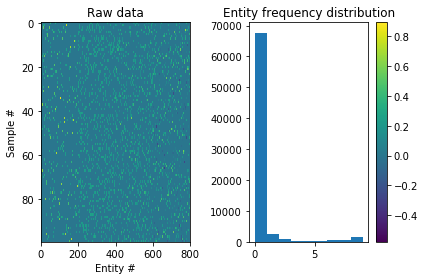

In [4]:
x, y, f = fringiness(res_to_matrix(res_onion))
plot = embedding_plot_bokeh(x, y, f)
histogram = histogram_bokeh(f)
show(plot)
show(histogram)

In [8]:
x, y, f = fringiness(res_to_matrix(res_times))
(ents, tops) = res_to_annot(res_times)
# Get a plot
plot = embedding_plot_bokeh(x, y, f)
plot = add_hovertool(plot, x, y, ents, tops)
show(plot)

/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('dists', 75), ('entities', 101), ('numEnts', 101), ('topics', 101), ('x', 75), ('y', 75)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
